# Linear Regression from Scratch

In this exercise, we use an abridged version of the Ames housing data to create a linear regression from scratch. 

You can download the modified data from my Github repo. 

[Ames Housing Dataset, Modified](https://github.com/hjhuney/Machine-Learning-Algorithms/blob/master/Data/ames_housing_test_abridged.csv)

Either click on the "Raw" version and copy all data, or download the zip file of the repo, and go into the "Data" folder to find "ames_housing_test_abridged.csv". 

I have made certain feature transformations which help improve the predicative power of the dataset. 

You can download the original data at Kaggle. 

[House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)


# Imports Libraries and Set Preferences

In [500]:
# data science libraries
import pandas as pd
import numpy as np

# linear regression
from sklearn.linear_model import LinearRegression

# scoring
from sklearn.metrics import mean_squared_error

# visualization libraries
import altair as alt
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# enable altair visualizations
alt.renderers.enable()

# opaque background
alt.themes.enable('opaque')

# suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:0.2f}'.format}) 

# ignore warnings
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
warnings.filterwarnings("ignore", category=Warning)
print('Warnings will be ignored!')

Warnings will be ignored!


# Import Data

In [171]:
# data directoories
train_data = r'datasets/ames_housing_train_abridged.csv'
test_data = r'datasets/ames_housing_test_abridged.csv'

In [172]:
# load data into dataframes
train = pd.read_csv(train_data, index_col=[0])
test = pd.read_csv(test_data, index_col=[0])

In [173]:
train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,MasVnrType,...,TotalLivingSF,TotalMainBath,TotalBath,AgeSold,TotalPorchSF,TotalSF,TotalArea,GarageAgeSold,LastRemodelYrs,NbhdPricePerSF
0,1,60,65.00,8450,7,5,2003,2003,6,3,...,2566,2.50,3.50,5,61,2416,3114,5.00,5,75.04
1,2,20,80.00,9600,6,8,1976,1976,1,0,...,2524,2.00,2.50,31,298,2240,2984,31.00,31,83.46
2,3,60,68.00,11250,7,5,2001,2002,6,3,...,2706,2.50,3.50,7,42,2272,3314,7.00,6,75.04
3,4,70,60.00,9550,7,5,1915,1970,1,0,...,2473,1.00,2.00,91,307,1933,3115,8.00,36,74.77
4,5,60,84.00,14260,8,5,2000,2000,6,3,...,3343,2.50,3.50,8,276,2853,4179,8.00,8,83.77


## Relationship between Total Livable Square Footage and Sales Price

Let's do a quick visualization showing the relationship between livable square footage and sales price for each house. 

C:\Users\Jake\Anaconda3\envs\mainenv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[(0, 5000)]

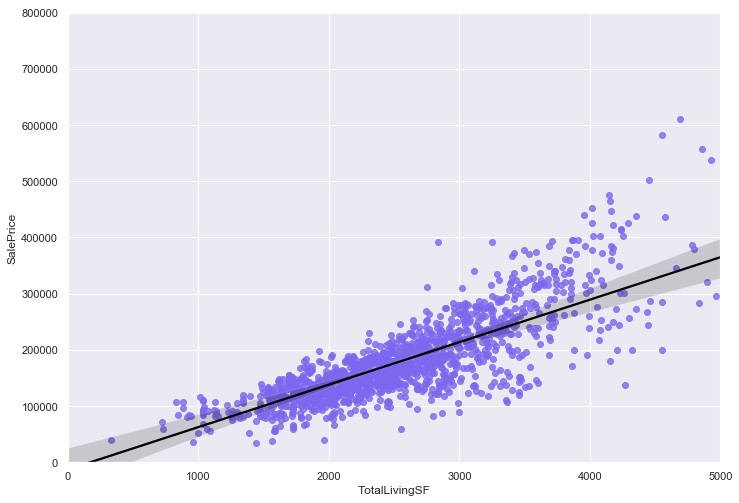

In [174]:
ax = sns.regplot(x="TotalLivingSF", y="SalePrice", data=train, 
                 scatter_kws={"color": "mediumslateblue"}, line_kws={"color": "black"})
ax.set(ylim=(0,800000))
ax.set(xlim=(0,5000))

We can see that, in general, the more living square footage the house has, the higher the selling price. 

We expect a house with 2,000 livable square feet, for instance, to sell around the $120K - 150K range in this dataset

# Simple Linear Regression Formula

The formula for linear regression is simply a variant of the formula for a straight line in geometery:

### $y = mx+b$

* $m$ = slope
* $b$ = y-intercept
* $x$ = independent variable
* $y$ = dependent variable


The equation for linear regression is similar:

### $y = \beta_{1}X + \beta_{0}$

In this case:

* $\beta_{1}$ = slope
* $\beta_{0}$ = y-intercept

Now comes the mathy part of this. In order to find $\beta_{0}$ and $\beta_{1}$, there are two different techniques we can use. The most common one is the Ordinary Least Squares method. Another approach inovlves using gradient descent. We will use ordinary least squares. 

The formulas for beta_0 (our y-int) and beta_1 (our slope) are below:


### $\beta_{0} = \frac{(\Sigma y)(\Sigma x^2) - (\Sigma x)(\Sigma xy)} {n(\Sigma x^2) - (\Sigma x)^2}$

### $\beta_{1} = \frac{n(\Sigma xy) - (\Sigma x)(\Sigma y)} {n(\Sigma x^2) - (\Sigma x)^2} $

If you want a further explanation on this, I recommend [Statistics How To](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/regression-analysis/find-a-linear-regression-equation/) as a source. 


# Simple Regression

In [175]:
simple_reg_df = train[['TotalLivingSF', 'SalePrice']].copy()

Our "x" variable (the independent variable) is total livable square footage ("TotalLivingSF") while our "y" variable (the dependent variable) is the sale price of the home ("SalePrice"). 

Let's now calculate x-squared, y-squared, and xy for each datapoint

In [176]:
simple_reg_df['X^2'] = simple_reg_df['TotalLivingSF'] ** 2
simple_reg_df['Y^2'] = simple_reg_df['TotalLivingSF'] ** 2
simple_reg_df['XY'] = simple_reg_df['TotalLivingSF'] * simple_reg_df['SalePrice']

In [177]:
simple_reg_df

,TotalLivingSF,SalePrice,X^2,Y^2,XY
0,2566,208500,6584356,6584356,535011000
1,2524,181500,6370576,6370576,458106000
2,2706,223500,7322436,7322436,604791000
3,2473,140000,6115729,6115729,346220000
4,3343,250000,11175649,11175649,835750000
...,...,...,...,...,...
1455,2600,175000,6760000,6760000,455000000
1456,3615,210000,13068225,13068225,759150000
1457,3492,266500,12194064,12194064,930618000
1458,2156,142125,4648336,4648336,306421500


With that, we can now calculate all the necessary sums

In [178]:
# sum of x-squared, y, x, and x*y
sum_x_sq = np.sum(simple_reg_df['X^2'])
sum_y = np.sum(simple_reg_df['SalePrice'])
sum_x = np.sum(simple_reg_df['TotalLivingSF'])
sum_xy = np.sum(simple_reg_df['XY'])

# n = number of rows in dataframe
n = simple_reg_df.shape[0]

Note that the denominator for $\beta_{0}$ and $\beta_{1}$ are the same, so we can calculate that seperately, before calculating the numerators.

In [179]:
denom = (n * sum_x_sq) - (sum_x ** 2)

Now we calculate the numerators for both $\beta_{0}$ and $\beta_{1}$

In [180]:
beta_0_num = ((sum_y * sum_x_sq) - (sum_x * sum_xy))

In [181]:
beta_1_num = n * sum_xy - sum_x * sum_y

Finally, we can calculate the results.

In [182]:
beta_0 = beta_0_num / denom

In [183]:
beta_1 = beta_1_num / denom

In [184]:
print("beta_0: ", beta_0)
print("beta_1: ", beta_1)

beta_0:  -13219.802498938292
beta_1:  75.62809528037232


## Calculate our Predictions

In [185]:
simple_reg_df['y_pred'] = simple_reg_df['TotalLivingSF'] * beta_1 + beta_0

In [186]:
simple_reg_df.head()

,TotalLivingSF,SalePrice,X^2,Y^2,XY,y_pred
0,2566,208500,6584356,6584356,535011000,180841.89
1,2524,181500,6370576,6370576,458106000,177665.51
2,2706,223500,7322436,7322436,604791000,191429.82
3,2473,140000,6115729,6115729,346220000,173808.48
4,3343,250000,11175649,11175649,835750000,239604.92


## Calculate Root Mean Squared Error (RMSE)

In [189]:
simple_reg_df['error'] = simple_reg_df['y_pred'] - simple_reg_df['SalePrice']
simple_reg_df['squared_error'] = simple_reg_df['error'] ** 2

In [190]:
simple_reg_df.head()

,TotalLivingSF,SalePrice,X^2,Y^2,XY,y_pred,error,squared_error
0,2566,208500,6584356,6584356,535011000,180841.89,-27658.11,764971049.30
1,2524,181500,6370576,6370576,458106000,177665.51,-3834.49,14703313.65
2,2706,223500,7322436,7322436,604791000,191429.82,-32070.18,1028496231.66
3,2473,140000,6115729,6115729,346220000,173808.48,33808.48,1143013125.81
4,3343,250000,11175649,11175649,835750000,239604.92,-10395.08,108057687.72


Now that we've calculated the residuals ("error") and the squares of the residuals ("squared error"), we can calculate RMSE. 

We take the sum of the squared residuals and then divide by "n" (the number of rows / observations); that is, we find the mean squared error. 

In [193]:
mean_squared_error = simple_reg_df.squared_error.sum() / n

In [194]:
rmse = np.sqrt(mean_squared_error)
print("Root Mean Squared Error (RMSE): ", rmse)

Root Mean Squared Error (RMSE):  49471.91589851819


# Multiple Linear Regression


The formula to find our coefficients is now a bit more complicated with multiple linear regression. 

### $\beta = (X^TX)^{-1}X^Ty $

We will need to do some transposition, matrix multiplication, and inversion. This will be much easier in Python than by hand, but the logic can be difficult to follow.

### Select Features

Before we worry about the math, we need to first select the features for our multiple linear regression model. 

'SalePrice' is still our dependent ("y") variable.

Now we will use 3 independent ("X") variables to try to predict it. We'll keep 'TotalLivingSF' from our first regression, but now we'll add Condition ('OverallCond') and Neighborhood Price per Square Foot ('NbhdPricePerSF'). 

Keep in mind, we're not trying to create an award winning algorithm here; just trying to explain how multiple linear regression works.

In [441]:
# create dataframe with our 4 relevant columns
multi_reg_df = train[['TotalLivingSF', 'OverallCond', 'NbhdPricePerSF', 'SalePrice']]

# create arrays of our X and y values
X = train[['TotalLivingSF', 'OverallCond', 'NbhdPricePerSF']].values
y = train['SalePrice'].values

### Create an Array of Ones

After selecting our features, our next step is to create an array of 1's in the shape of (number of rows, 1). Then we need to append this array to our X array for the intercept (bias) term. 

In this example, our X array has a shape of (1460,3), or 1460 rows, 3 columns. When we add the array of 1's, we'll get a new array of the shape (1460,4).

In [429]:
# find number of rows
rows = X.shape[0]

In [432]:
ones = np.ones(shape=rows).reshape(-1, 1)
ones

array([[1.00],
       [1.00],
       [1.00],
       ...,
       [1.00],
       [1.00],
       [1.00]])

In [443]:
X = np.concatenate((X, ones), 1)
X

array([[2566.00, 5.00, 75.04, 1.00],
       [2524.00, 8.00, 83.46, 1.00],
       [2706.00, 5.00, 75.04, 1.00],
       ...,
       [3492.00, 9.00, 74.77, 1.00],
       [2156.00, 6.00, 62.50, 1.00],
       [2512.00, 6.00, 57.24, 1.00]])

### Tranposing, Inverting, and Matrix Multiplying

Now the trickier part, but we'll walk through it step by step. First, let's transpose our new X matrix.

In [445]:
X_T = X.transpose()
X_T

array([[2566.00, 2524.00, 2706.00, ..., 3492.00, 2156.00, 2512.00],
       [5.00, 8.00, 5.00, ..., 9.00, 6.00, 6.00],
       [75.04, 83.46, 75.04, ..., 74.77, 62.50, 57.24],
       [1.00, 1.00, 1.00, ..., 1.00, 1.00, 1.00]])

Next, let's take the dot product of our transposed matrix ("X_T") and our X matrix. 

In [446]:
X_mod = X_T.dot(X)
X_mod

array([[10606156543.00, 20703911.00, 264144946.00, 3747891.00],
       [20703911.00, 47190.00, 557411.20, 8140.00],
       [264144946.00, 557411.20, 7100388.79, 100721.18],
       [3747891.00, 8140.00, 100721.18, 1460.00]])

Now, we need to invert the result

In [447]:
X_mod = np.linalg.inv(X_mod)
X_mod

array([[0.00, 0.00, -0.00, -0.00],
       [0.00, 0.00, 0.00, -0.00],
       [-0.00, 0.00, 0.00, -0.00],
       [-0.00, -0.00, -0.00, 0.06]])

### Voila!

Now we can finally discover our coefficients by taking the dot product of the previous result and X_T * y

In [449]:
coefficients = X_mod.dot(X_T).dot(y)
coefficients

array([57.62, 8510.46, 3465.83, -253547.76])

## Let's Make Predictions!

We're now through with the most complicated part. With our coefficients in place, it's just some simple addition and multiplication to find our predictions.

Let's load our dataframe back up to see the process in action.

In [451]:
multi_reg_df.head()

,TotalLivingSF,OverallCond,NbhdPricePerSF,SalePrice
0,2566,5,75.04,208500
1,2524,8,83.46,181500
2,2706,5,75.04,223500
3,2473,5,74.77,140000
4,3343,5,83.77,250000


Now we'll add the predictions

In [464]:
multi_reg_df['y_pred'] = coefficients[3] + coefficients[0] * multi_reg_df['TotalLivingSF'] + coefficients[1] * multi_reg_df['OverallCond'] + coefficients[2] * multi_reg_df['NbhdPricePerSF']

In [466]:
multi_reg_df.head()

,TotalLivingSF,OverallCond,NbhdPricePerSF,SalePrice,y_pred
0,2566,5,75.04,208500,196947.57
1,2524,8,83.46,181500,249237.65
2,2706,5,75.04,223500,205014.87
3,2473,5,74.77,140000,190646.77
4,3343,5,83.77,250000,271970.02


In [467]:
multi_reg_df['error'] = multi_reg_df['y_pred'] - multi_reg_df['SalePrice']
multi_reg_df['squared_error'] = multi_reg_df['error'] ** 2

In [469]:
multi_reg_df.head()

,TotalLivingSF,OverallCond,NbhdPricePerSF,SalePrice,y_pred,error,squared_error
0,2566,5,75.04,208500,196947.57,-11552.43,133458568.10
1,2524,8,83.46,181500,249237.65,67737.65,4588389679.69
2,2706,5,75.04,223500,205014.87,-18485.13,341699857.36
3,2473,5,74.77,140000,190646.77,50646.77,2565095664.19
4,3343,5,83.77,250000,271970.02,21970.02,482681827.83


## Calculate Root Mean Squared Error (RMSE)

In [470]:
mean_squared_error_multi = multi_reg_df.squared_error.sum() / n

In [472]:
mean_squared_error_multi

1494050961.8816855

In [473]:
rmse_multi = np.sqrt(mean_squared_error_multi)
print("Root Mean Squared Error (RMSE): ", rmse_multi)

Root Mean Squared Error (RMSE):  38652.95540940803


## Evaluating Results

We get a RMSE of 38,652. This is a significant improvement over the result for a simple regression, which was 49,471. Therefore, we can see that adding more features to this regression can improve its predicative power. 

# Run Our Regression in SK-Learn

We've now learned how to run our regression the difficult way, by hand-coding every element from scratch. Now, let's do it the much easier way using the Scikit Learn library in Python.

In [491]:
# create arrays of our X and y values
X = train[['TotalLivingSF', 'OverallCond', 'NbhdPricePerSF']].values
y = train['SalePrice'].values

In [481]:
# set up Linear Regression model
lr = LinearRegression()

In [483]:
# fit X and y to model
lr_model = lr.fit(X,y)

In [485]:
# score returns R-squared for the model
lr_score = lr.score(X, y)
lr_score

0.7631043213732622

In [486]:
# here we can see our coefficients
lr_coefs = lr.coef_
lr_coefs

array([57.62, 8510.46, 3465.83])

In [487]:
# also the y-intercept, which is grabbed via a seperate method
lr_yint = lr.intercept_ 
lr_yint

-253547.762474974

In [489]:
# make our predictions
lr_preds = lr.predict(X)
lr_preds

array([196947.57, 249237.65, 205014.87, ..., 283407.04, 138351.67,
       140665.28])

In [498]:
# calculate RMSE
# note: sklearn only calculates mean squared error so we need to use numpy to calculate the square root of MSE
lr_rmse = np.sqrt(mean_squared_error(y, lr_preds))
lr_rmse

38652.95540940803

# That's All Folks!


# Other Resources

Most of which are better than mine!

* Statistics How To: [Simple Linear Regression](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/regression-analysis/find-a-linear-regression-equation/)
* Mubaris NK: [Linear Regression from Scratch](https://mubaris.com/posts/linear-regression/)
* Dario Radečić: [Multiple Regression from Scratch in Numpy](https://towardsdatascience.com/multiple-linear-regression-from-scratch-in-numpy-36a3e8ac8014)